In [163]:
import pandas
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
import seaborn

In [164]:
data = pandas.read_csv("CW - part 2/data/processed.pkl.gz")

In [165]:
# clone database and convert CDR column to bool
data1 = data.copy()
data1["CDR"] = data1['CDR'].map({'very mild': True, 'mild': True, 'moderate': True, 'none': False})

In [166]:
# Set up has dementia column for Binary Tree
data.insert(13,"has_dementia?", data1["CDR"])

In [167]:
y_target = data["has_dementia?"]
x_data = data.drop("has_dementia?", axis="columns")

In [168]:
le_CDR = LabelEncoder()
le_sex = LabelEncoder()
le_hand = LabelEncoder()
le_MRI_visit = LabelEncoder()
x_data['CDR_num'] = le_CDR.fit_transform(x_data['CDR'])
x_data['sex_num'] = le_sex.fit_transform(x_data['sex'])
x_data['hand_num'] = le_hand.fit_transform(x_data['hand'])
x_data['MRI_visit_num'] = le_MRI_visit.fit_transform(x_data['MRI_visit'])

In [169]:
x_data = x_data.drop(['CDR','sex','hand','MRI_visit', 'ID'],axis='columns')

<AxesSubplot:xlabel='MMSE', ylabel='has_dementia?'>

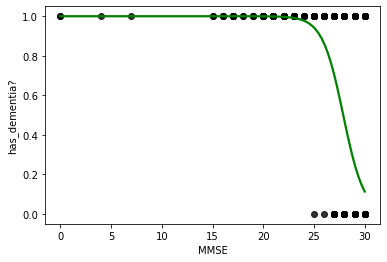

In [170]:
x = x_data["MMSE"]
y = data["has_dementia?"]

seaborn.regplot(x=x,y=y,data=data,logistic=True,ci=None, line_kws={'color': 'green'}, scatter_kws={'color': 'black'})

In [171]:
data1.CDR.value_counts()

False    206
True     167
Name: CDR, dtype: int64

In [172]:
logistic_reg = lr(multi_class="ovr", max_iter=4009).fit(x_data, y_target)

In [173]:
logistic_reg.predict(x_data[:])

array([ True, False,  True,  True,  True, False, False, False,  True,
       False,  True, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False,  True,  True,
        True,  True, False,  True, False,  True, False, False,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False,  True,  True,
        True,  True,

In [174]:
logistic_reg.predict_proba(x_data[:10]).round(2)

array([[0.29, 0.71],
       [0.93, 0.07],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.86, 0.14],
       [0.67, 0.33],
       [0.5 , 0.5 ],
       [0.95, 0.05]])

In [175]:
logistic_reg.score(x_data,y)

0.8954423592493298

In [176]:
predicted = logistic_reg.predict(x_data)

In [177]:
report = metrics.classification_report(y, predicted)

In [179]:
print(report)

              precision    recall  f1-score   support

       False       0.88      0.93      0.91       206
        True       0.91      0.85      0.88       167

    accuracy                           0.90       373
   macro avg       0.90      0.89      0.89       373
weighted avg       0.90      0.90      0.90       373



In [181]:
cross_val_score(lr(max_iter=4009, multi_class="ovr"), x_data, y_target, scoring="f1", cv=8).mean()

0.8681560373857444

In [182]:
cross_val_score(lr(max_iter=4009, multi_class="ovr"), x_data, y_target, scoring="accuracy", cv=8).mean()

0.8873149861239593